In [1]:
import json
import numpy as np 
import matplotlib.pyplot as plt
import concurrent.futures
from tqdm import tqdm
plt.rcParams['figure.dpi'] = 200
from utils import *

In [2]:
lamda = 0.2
min_distance = 0.1 
t = 200
nbSources = 5
SNRs = [-10, -5, 0, 5, 10, 15, 20]
mc = 1000

rmspe = RMSPE(nbSources)

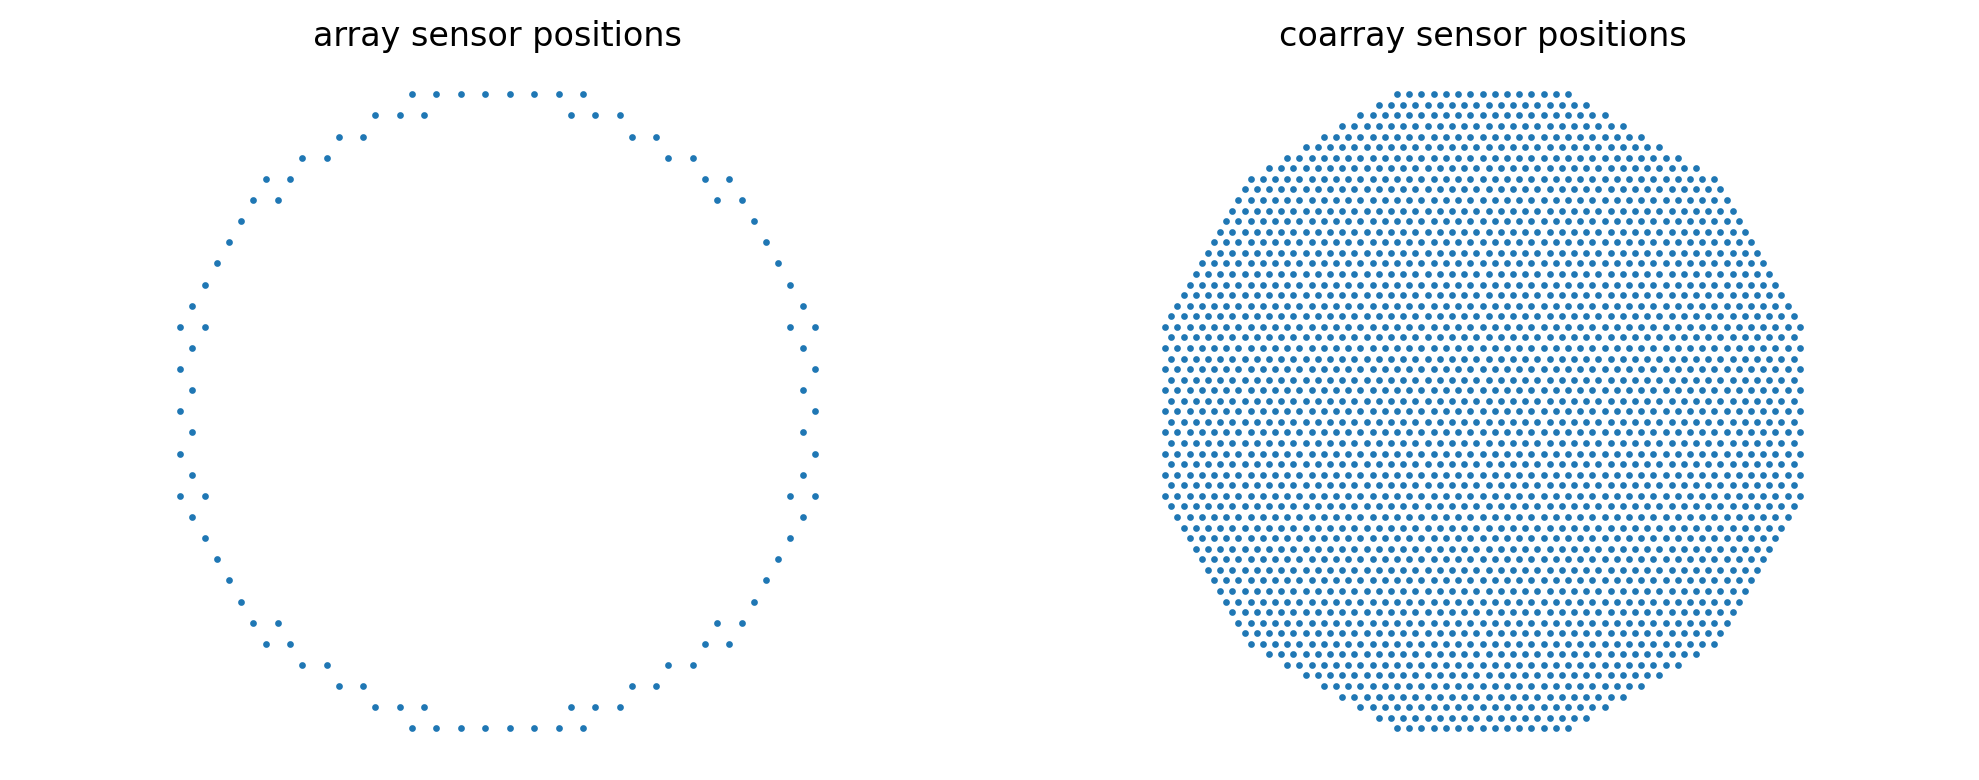

In [3]:
HA = HexagonalArray(lamda=lamda, min_distance=min_distance)
HA.build_coarray()
HA.build_array_manifold()
HA.plot()

In [4]:
len(HA.pos_coarray_dict)

2575

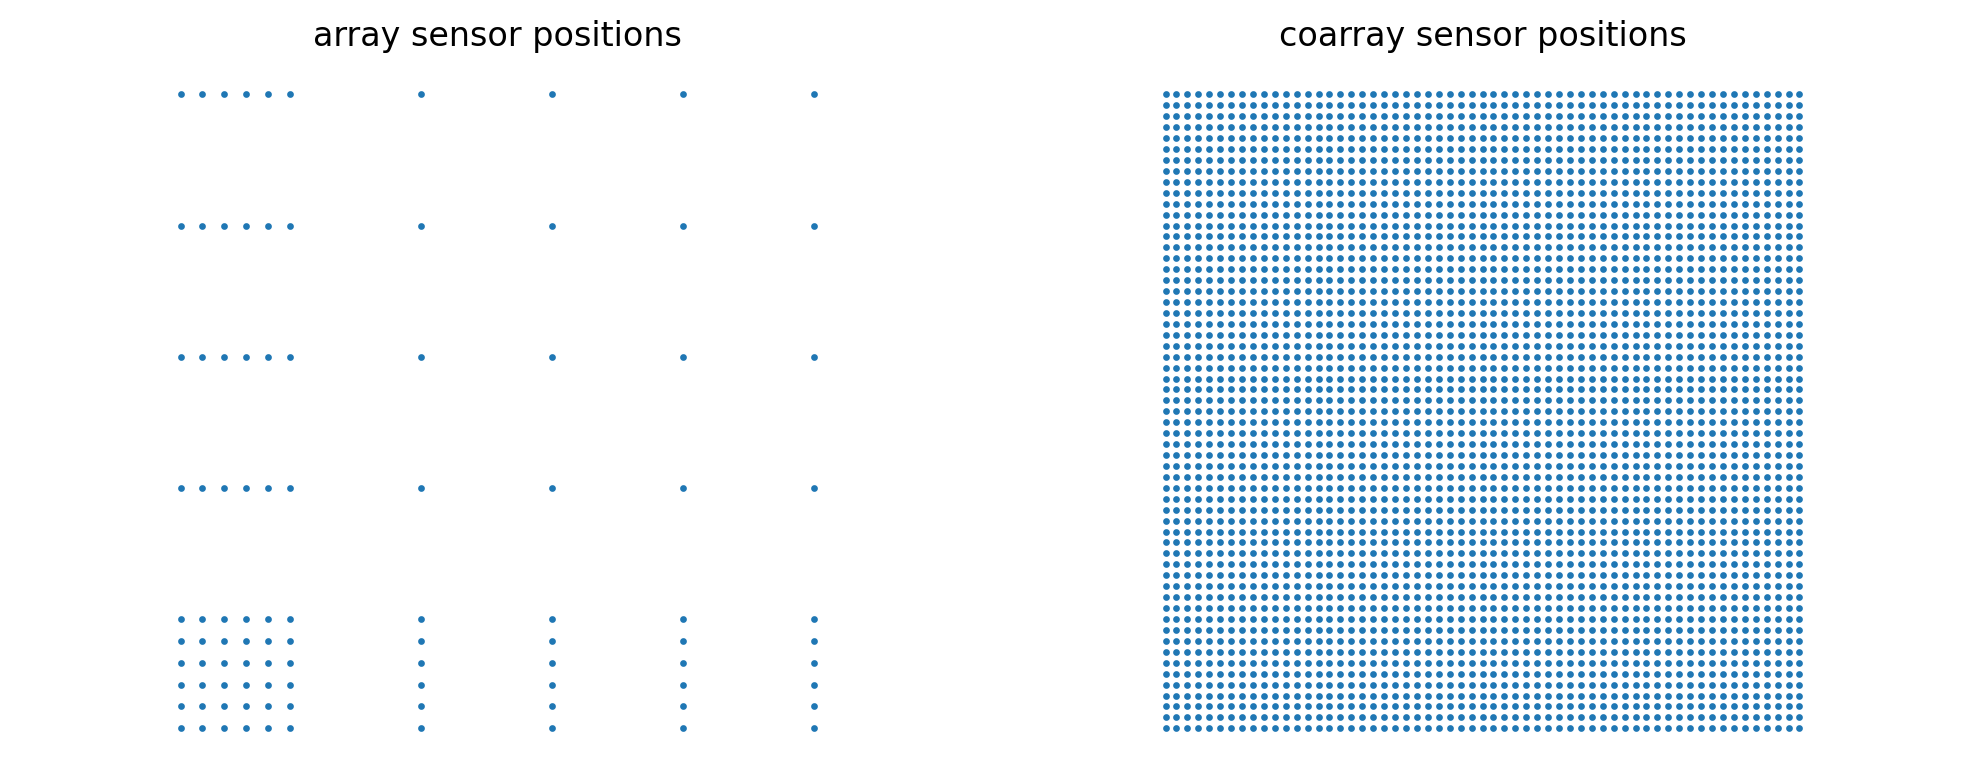

In [5]:
NA = NestedArray2D(lamda=lamda, min_distance=min_distance, levels_horizontal=[5, 5], levels_vertical=[5, 5])
NA.build_coarray()
NA.build_array_manifold()
NA.plot()

In [6]:
len(NA.pos_coarray_dict)

3481

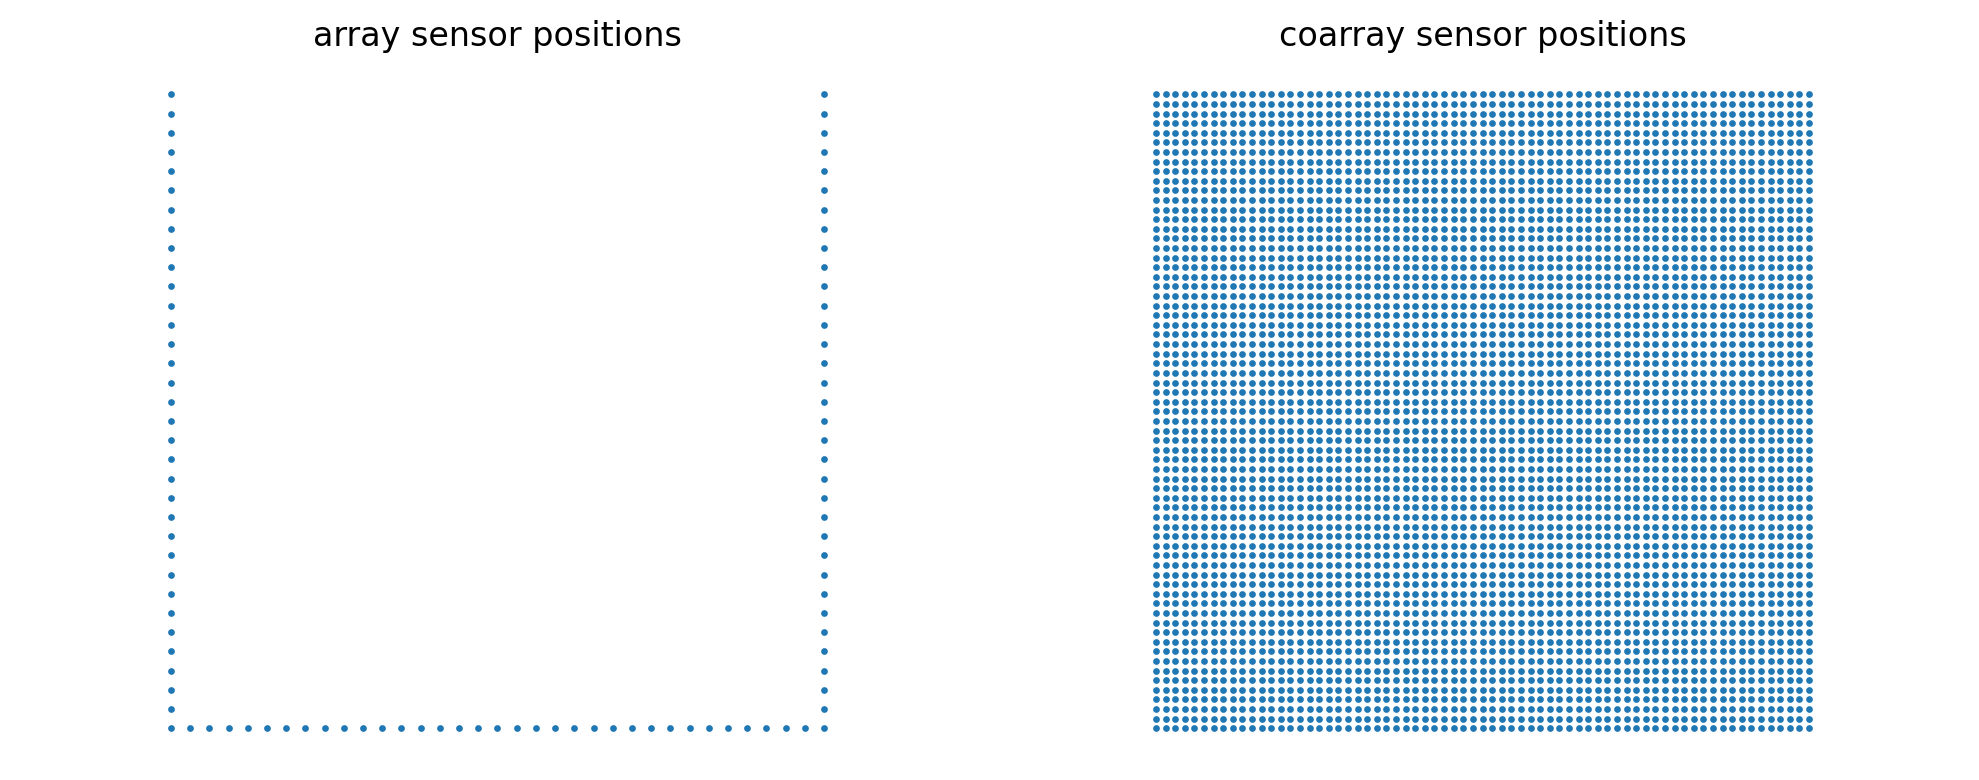

In [7]:
OB = OpenBoxArray(lamda=lamda, min_distance=min_distance, size_horizontal=35, size_vertical=34)
OB.build_coarray()
OB.build_array_manifold()
OB.plot()

In [8]:
len(OB.pos_coarray_dict)

4623

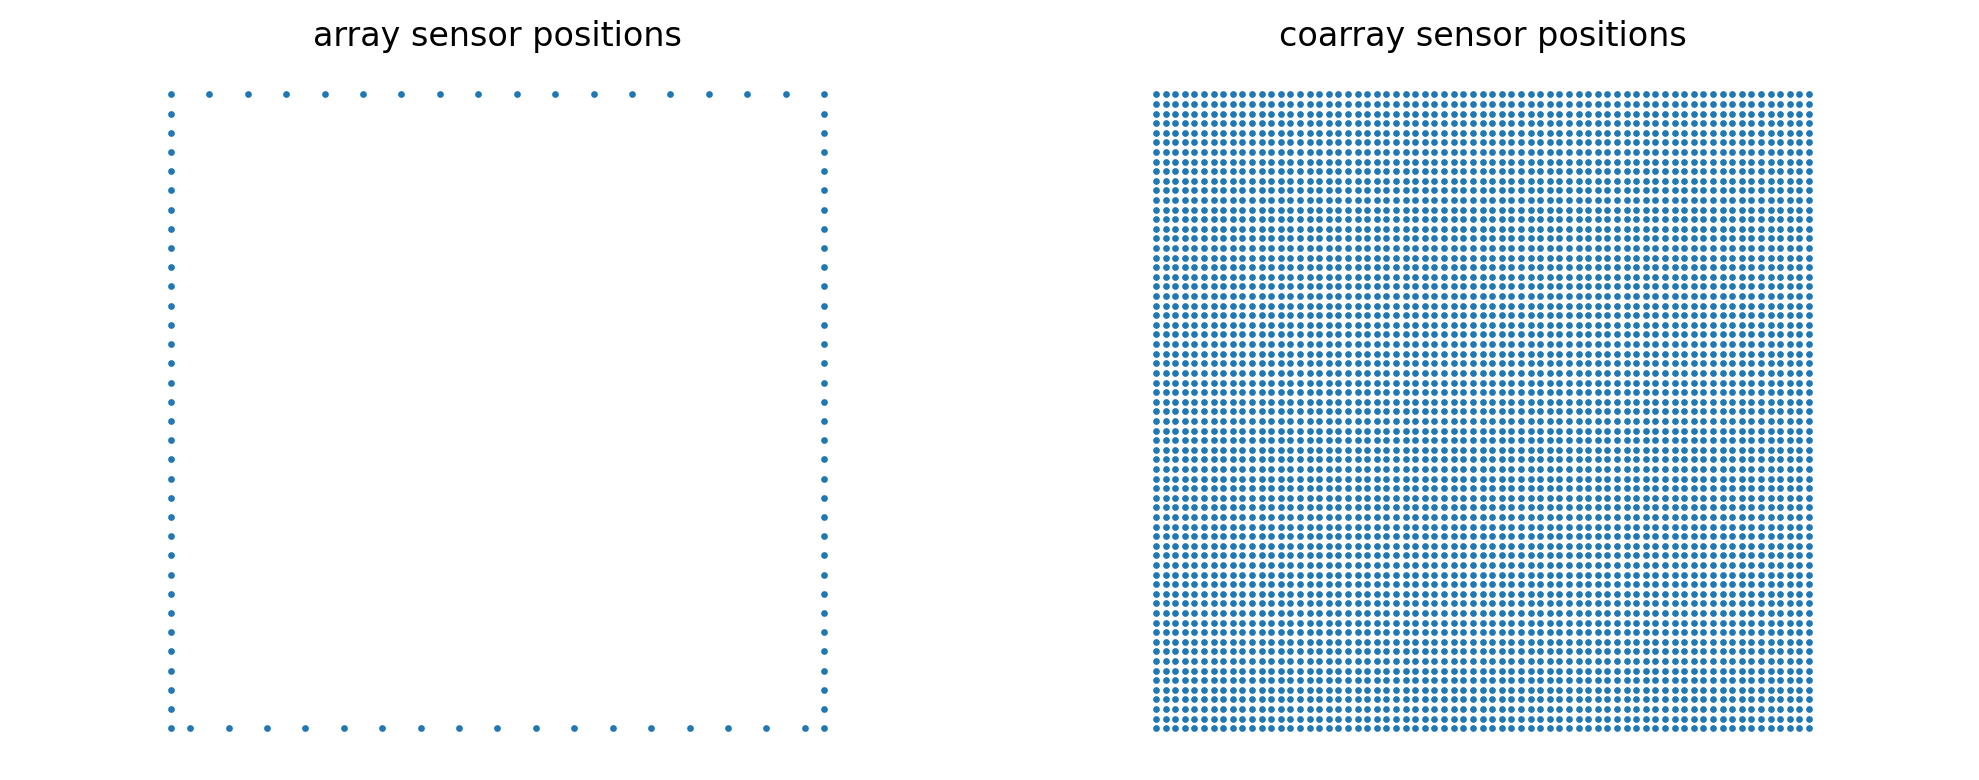

In [9]:
HOB = HalfOpenBoxArray(lamda=lamda, min_distance=min_distance, size_horizontal=35, size_vertical=34)
HOB.build_coarray()
HOB.build_array_manifold()
HOB.plot(savename="halfopenbox")

In [10]:
len(HOB.pos_coarray_dict)

4623

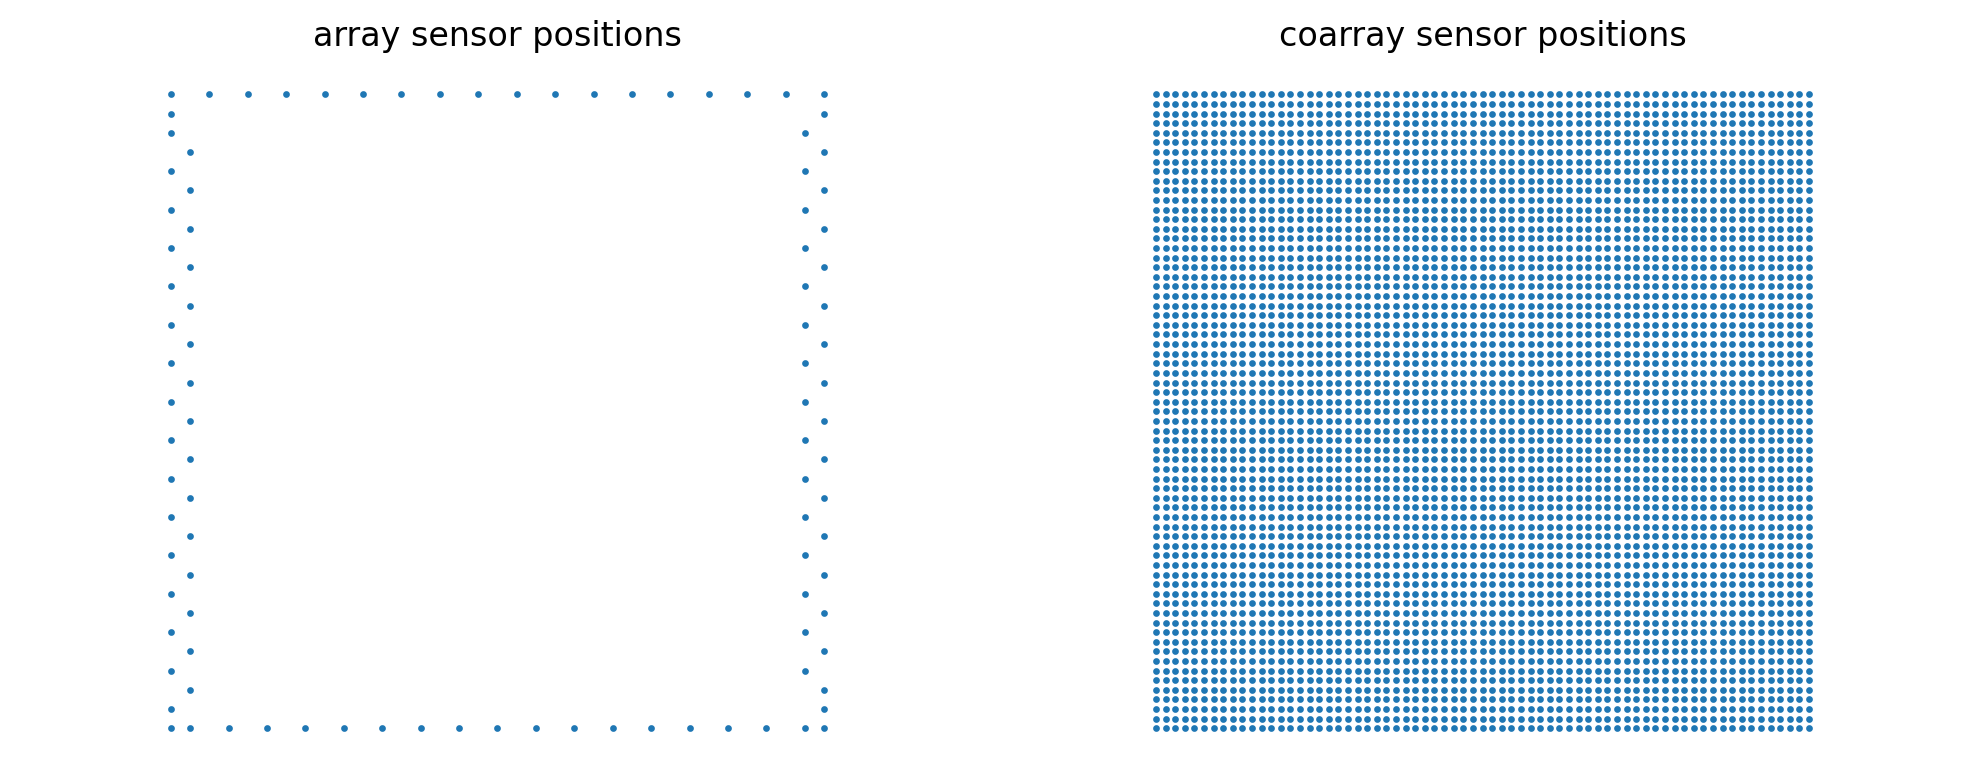

In [11]:
HOB2 = HalfOpenBoxArray2(lamda=lamda, min_distance=min_distance, size_horizontal=35, size_vertical=34)
HOB2.build_coarray()
HOB2.build_array_manifold()
HOB2.plot(savename="halfopenbox2")

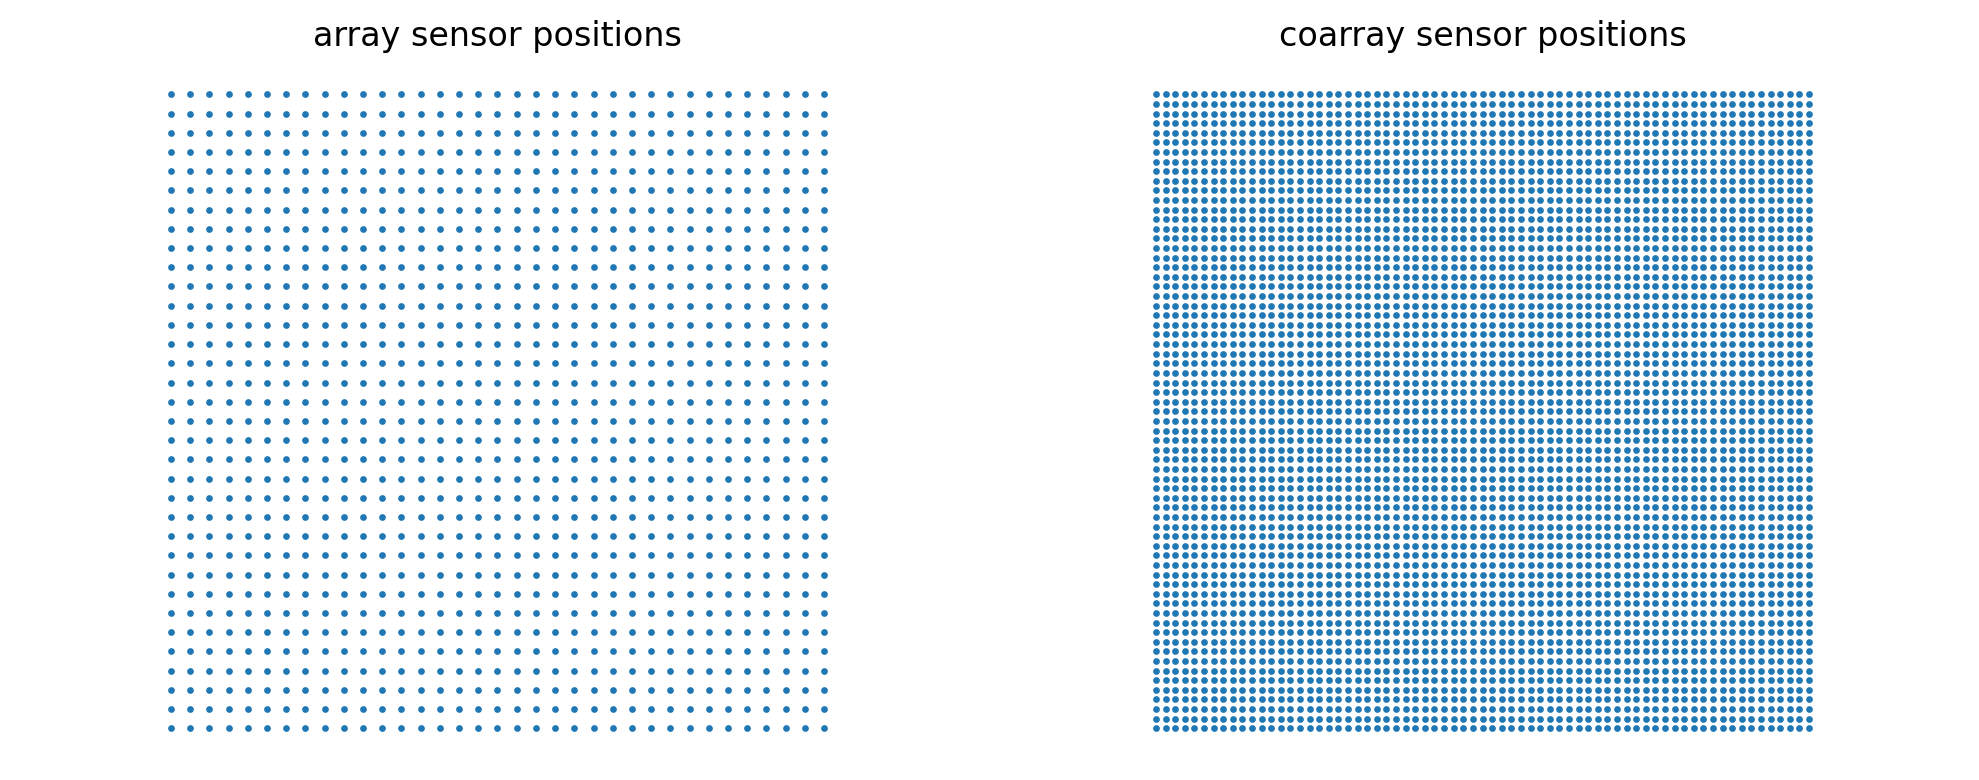

In [12]:
URA = UniformRectangularArray(lamda=lamda, min_distance=min_distance, size_horizontal=35, size_vertical=34)
URA.build_coarray()
URA.build_array_manifold()
URA.plot(savename="ura")

In [13]:
# rmspe_func = RMSPE(nbSources)

# arrays = {"Hexagonal Array": HA,
#           "Nested Array": NA,
#           "Open Box Array": OB,
#           "Half Open Box Array": HOB,
#           "Half Open Box Array 2": HOB2,
#           "Uniform Rectangular Array": URA}

# def run_trial(snr):

#     rmspe = {}
#     for key in arrays: 
#         rmspe[key+" - FFT"] = []
#         rmspe[key+" - MUSIC"] = []

#     for _ in tqdm(range(mc)):

#         phi_true = generate_angles(nbSources, 0, np.pi)
#         theta_true = generate_angles(nbSources, 0, np.pi/2)
#         S = (np.random.randn(nbSources, t) + 1j * np.random.randn(nbSources, t)) / sqrt(2)

#         for key in arrays:
#             noise = (np.random.randn(arrays[key].nbSensors, t) + 1j * np.random.randn(arrays[key].nbSensors, t)) / sqrt(2) * sqrt(nbSources) * 10 ** (-snr/20)
#             X = arrays[key].get_steering_vector(phi_true, theta_true) @ S + noise
#             estimated_phi_fft, estimated_theta_fft = arrays[key].estimate_doa_fft(X, nbSources)
#             rmspe[key+" - FFT"].append(rmspe_func.calculate(estimated_phi_fft, estimated_theta_fft, phi_true, theta_true))
#             estimated_phi_music, estimated_theta_music = arrays[key].estimate_doa_music(X, nbSources)
#             rmspe[key+" - MUSIC"].append(rmspe_func.calculate(estimated_phi_music, estimated_theta_music, phi_true, theta_true))

#     result = {}
#     for key, val in rmspe.items(): 
#         result[key] = sum(val) / mc

#     return result

# with concurrent.futures.ProcessPoolExecutor() as executor:
#     results = list(executor.map(run_trial, SNRs))

# plot_data = {}
# for key in results[0].keys(): plot_data[key] = []

# for idx in range(len(SNRs)):
#     for key in plot_data.keys():
#         plot_data[key].append(results[idx][key])

# with open("results.json", "w") as f:
#     json.dump(plot_data, f, indent=4)

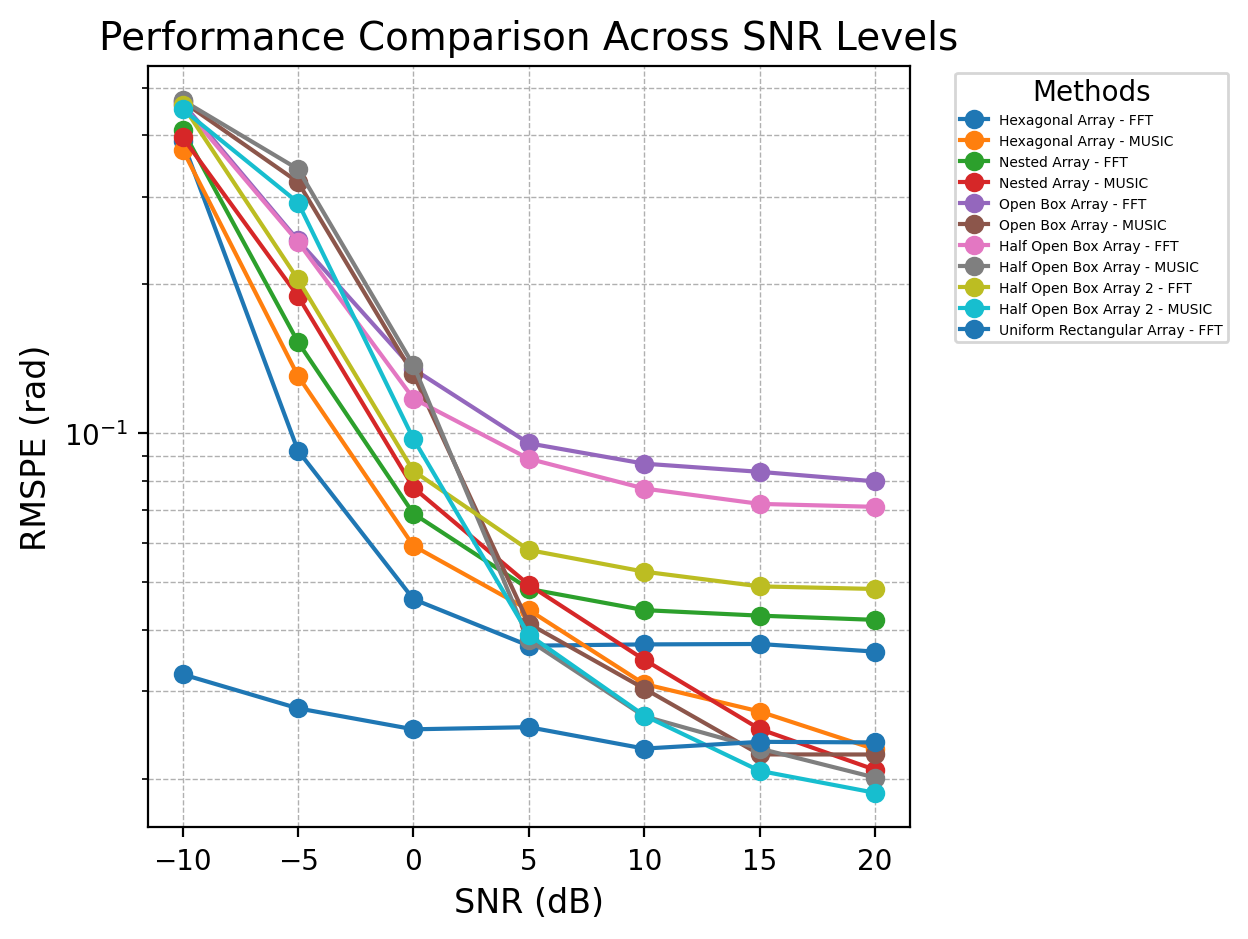

In [16]:
with open("results_t10_gap002.json", "r") as f:
    plot_data = json.load(f)

for key, val in plot_data.items():
    plt.plot(SNRs, val, marker='o', label=key)

plt.title("Performance Comparison Across SNR Levels", fontsize=14)
plt.xlabel("SNR (dB)", fontsize=12)
plt.ylabel("RMSPE (rad)", fontsize=12)
plt.yscale('log')
plt.xticks(SNRs)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(title="Methods", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=5)
plt.tight_layout()
plt.show()